In [14]:
# DATASET FOR CLUSTERING DEMONSTRATION
import numpy as np
import pandas as pd

X = np.array([
    [1,2],[2,1],[3,4],
    [5,7],[6,8],[7,6],
    [8,5],[4,3]
])

print(X)

[[1 2]
 [2 1]
 [3 4]
 [5 7]
 [6 8]
 [7 6]
 [8 5]
 [4 3]]


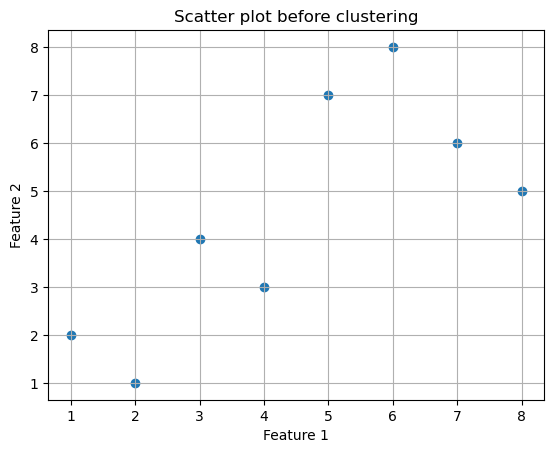

In [15]:
# VISUALIZATION BEFORE CLUSTERING

import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot before clustering")
plt.grid(True)
plt.show()

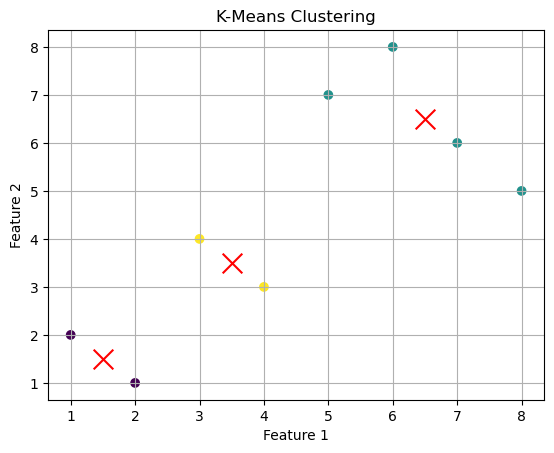

In [16]:
# K-MEANS CLUSTERING

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "2"

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init="auto", random_state=12)

labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="x",
    s=200,
    c="red"
)

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

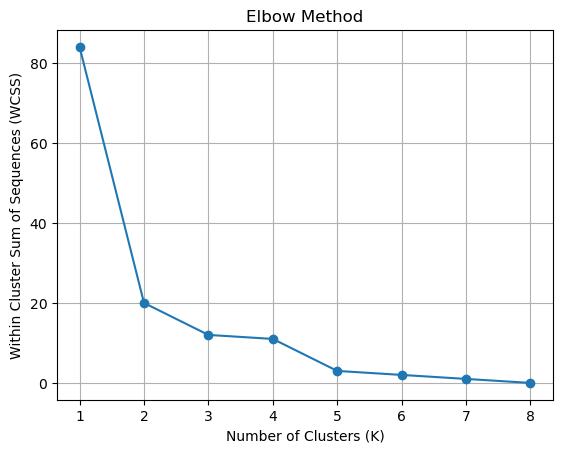

In [4]:
# ELBOW METHOD

"""
    Elbow Method:
    -Plot K vs WCSS
    -Elbow point gives optional k
"""

wcss =[]

for k in range(1,9):
    km = KMeans(n_clusters=k, n_init='auto', random_state=12)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,9),wcss,marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Cluster Sum of Sequences (WCSS)")
plt.grid(True)
plt.show()

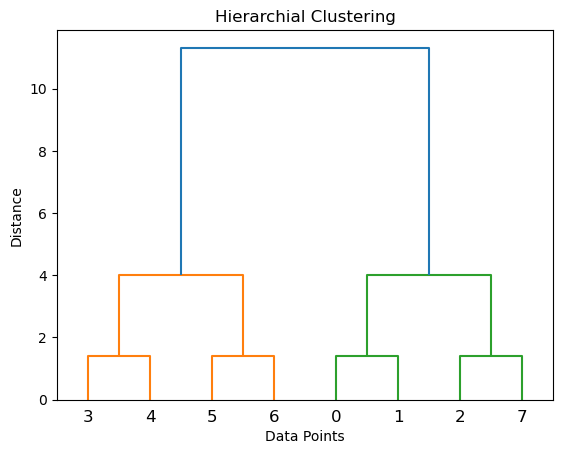

In [5]:
# HIERACRCHIAL CLUSTERING

from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')

dendrogram(Z)
plt.title("Hierarchial Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [6]:
# Package for K Medoids

In [7]:
pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


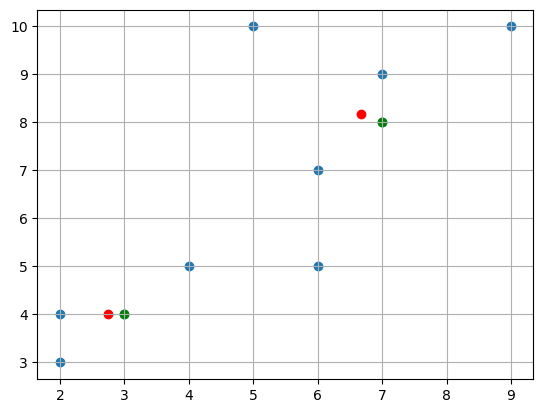


Centroids:  [[2.75       4.        ]
 [6.66666667 8.16666667]]
Medoids:  [[7. 8.]
 [3. 4.]]


In [8]:
#KMedoids

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

data = [[2,4],[2,3],[3,4],[4,5],[6,7],[7,8],[9,10],[5,10],[6,5],[7,9]]
df = pd.DataFrame(data, columns=['x','y'])

#KMeans
kmeans = KMeans(n_clusters=2,random_state=12, n_init='auto')
kmeans.fit(df)
centroids = kmeans.cluster_centers_

#KMedoids
kmedoid = KMedoids(n_clusters=2, random_state=12)
kmedoid.fit(df)
medoids = kmedoid.cluster_centers_

plt.scatter(df['x'], df['y'], label="Data")
plt.scatter(centroids[:,0], centroids[:,1], color = 'red')
plt.scatter(medoids[:,0], medoids[:,1], color = "green")
plt.grid(True)
plt.show()
print()
print("Centroids: ", centroids)
print("Medoids: ", medoids)

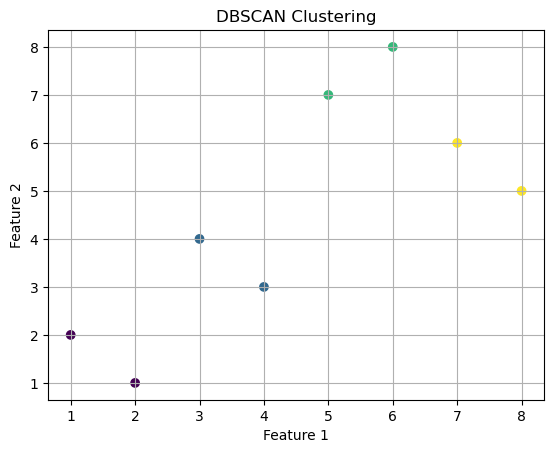

In [9]:
# DENSITY-BASED CLUSTERING (DBSCAN)
#DBSCAN is imported only when needed

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=2)
db_labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c = db_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [17]:
# Market Basket Analysis of grocery store

transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Beer', 'Bread'],
    ['Milk', 'Bread', 'Butter', 'Cheese'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Beer', 'Diapers'],
    ['Milk', 'Diapers', 'Beer', 'Bread'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread', 'Butter'],
    ['Beer', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Milk', 'Butter'],
    ['Bread', 'Cheese'],
    ['Milk', 'Bread', 'Butter'],
    ['Diapers', 'Beer'],
    ['Milk', 'Bread', 'Diapers', 'Beer'],
    ['Bread', 'Butter'],
    ['Milk', 'Cheese'],
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Beer']
]
print(transactions)

[['Milk', 'Bread', 'Butter'], ['Beer', 'Bread'], ['Milk', 'Bread', 'Butter', 'Cheese'], ['Bread', 'Butter'], ['Milk', 'Bread'], ['Beer', 'Diapers'], ['Milk', 'Diapers', 'Beer', 'Bread'], ['Bread', 'Butter'], ['Milk', 'Bread', 'Butter'], ['Beer', 'Bread', 'Butter'], ['Milk', 'Bread'], ['Milk', 'Butter'], ['Bread', 'Cheese'], ['Milk', 'Bread', 'Butter'], ['Diapers', 'Beer'], ['Milk', 'Bread', 'Diapers', 'Beer'], ['Bread', 'Butter'], ['Milk', 'Cheese'], ['Milk', 'Bread', 'Butter'], ['Bread', 'Beer']]


In [28]:
#To print transaction in dataframe
#Pandas is required only at this stage

import pandas as pd

#Convert transactions into DataFrame (One-hot encoding style)
items = sorted(set().union(*transactions))
data = []
for t in transactions:
    row = {item: (1 if item in t else 0) for item in items}
    data.append(row)

df = pd.DataFrame(data)
df.index = range(1, len(df) + 1)
df.index.name = "Transaction"

print(df)

             Beer  Bread  Butter  Cheese  Diapers  Milk
Transaction                                            
1               0      1       1       0        0     1
2               1      1       0       0        0     0
3               0      1       1       1        0     1
4               0      1       1       0        0     0
5               0      1       0       0        0     1
6               1      0       0       0        1     0
7               1      1       0       0        1     1
8               0      1       1       0        0     0
9               0      1       1       0        0     1
10              1      1       1       0        0     0
11              0      1       0       0        0     1
12              0      0       1       0        0     1
13              0      1       0       1        0     0
14              0      1       1       0        0     1
15              1      0       0       0        1     0
16              1      1       0       0        

In [46]:
min_support = 0.4  # since support is now a fraction

# SUPPORT FUNCTION
def support(itemset):
    return sum(1 for t in transactions if itemset.issubset(t)) / len(transactions)

# Apriori Principle Demonstration

#Step 1: Find frequent 1 - itemsets

items = sorted(set().union(*transactions))
freq_1 = [{i} for i in items if support({i}) >= min_support]
print("Frequent 1-itemsets")
for i in freq_1:
    print(i, "Support =", support(i))

# Generate candidate 2 itemsets

from itertools import combinations

candidate_2 = [ set(c) for c in combinations([list(i)[0] for i in freq_1], 2) ]

# Applying Apriori Pruning

freq_2 = [c for c in candidate_2 if support(c) >= min_support]
print("\n Frequent 2-itemsets (after Apriori pruning):")
for c in freq_2:
    print(c, "Support =", support(c))


Frequent 1-itemsets
{'Bread'} Support = 0.8
{'Butter'} Support = 0.5
{'Milk'} Support = 0.55

 Frequent 2-itemsets (after Apriori pruning):
{'Bread', 'Butter'} Support = 0.45
{'Bread', 'Milk'} Support = 0.45


In [47]:
# Support and Confidence Functions

def support(itemset, transactions):
    return sum(1 for t in transactions if itemset.issubset(t)) / len(transactions)


def confidence(X, Y, transactions):
    return support(X.union(Y), transactions) / support(X, transactions)


In [49]:
# Example rules

print("Support {'Bread'}", support({'Bread'},transactions))
print("Confidence {Bread -> Milk} :", confidence({'Bread'}, {'Milk'}, transactions))
print("Confidence {Bread -> Egg} :", confidence({'Bread'}, {'Egg'}, transactions))
print("Confidence {Milk -> Egg} :", confidence({'Milk'}, {'Egg'}, transactions))
print("Confidence {(Bread, Milk) -> Egg} :", confidence({'Bread', 'Milk'}, {'Egg'}, transactions))
print("Confidence {Beer -> Bread} :", confidence({'Beer'}, {'Bread'}, transactions))
print("Confidence {(Beer, Bread) -> Butter} :", confidence({'Beer', 'Bread'}, {'Butter'}, transactions))

Support {'Bread'} 0.8
Confidence {Bread -> Milk} : 0.5625
Confidence {Bread -> Egg} : 0.0
Confidence {Milk -> Egg} : 0.0
Confidence {(Bread, Milk) -> Egg} : 0.0
Confidence {Beer -> Bread} : 0.7142857142857143
Confidence {(Beer, Bread) -> Butter} : 0.2
